In [1]:
log = []
for line in open("multichannel_binary.log"):
    log.append(line.strip())    

In [2]:
import re
import numpy as np
def parse_best_error(log, ps):
    ret_val = []
    for line in log:
        if line.find(ps) != -1:
            ret_val.append(float(
                re.findall("[-+]?\d+[\.]?\d+[eE]?[-+]?\d*", line)[0]))
    return np.asarray(ret_val)        

In [3]:
best_dev_err = parse_best_error(log, "best dev err")

In [4]:
test_performance = parse_best_error(log, "test perf")

In [5]:
def mean_std(a):
    return np.mean(a), np.std(a)

In [6]:
#Mean and std of the "best dev error: "
mean_std(best_dev_err)

(87.902675014228706, 0.1857716717159941)

In [7]:
#Mean and std of the "test performance: "
mean_std(test_performance)

(87.7098551839034, 0.20494919379369003)

In [8]:
fold = -1
folds = {}
def findAll(line):
    #return re.findall("[-+]?\d+[\.]?\d+[eE]?[-+]?\d+", line)
    return re.findall("\d+\.?\d*", line)

for line in log:
    if line.find("fold")!=-1:
        fold = int(re.findall(r'\d+', line)[0])
    if line.find("epoch:")!=-1 and fold > 0:
        if fold in folds:
            folds.get(fold).append(findAll(line))
        else: 
            folds[fold] = [findAll(line)]       

In [9]:
train_perf = []
val_perf = []
for key in sorted(folds.iterkeys()):
    if key < 8:
        tpf = []
        vpf = []
        for l in folds[key]:
            tpf.append(float(l[1]))
            vpf.append(float(l[2]))
        train_perf.append(tpf)
        val_perf.append(vpf)

In [10]:
val_perf_m=np.matrix(val_perf)
train_perf_m=np.matrix(train_perf)

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

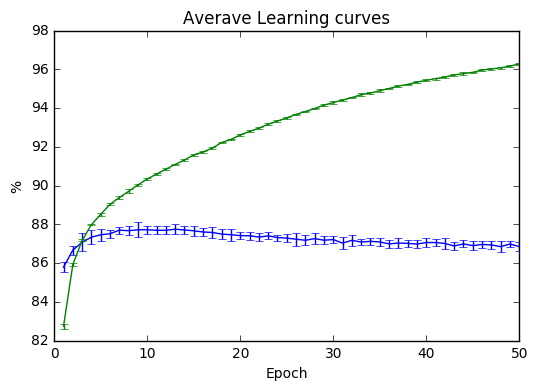

In [12]:
x = np.arange(1, 51, 1);
x.shape
error_val = np.array(np.transpose(val_perf_m.std(0))).ravel()
y_val= np.array(np.transpose(val_perf_m.mean(0))).ravel()
error_train = np.array(np.transpose(train_perf_m.std(0))).ravel()
y_train= np.array(np.transpose(train_perf_m.mean(0))).ravel()
plt.errorbar(x, y_val, yerr=error_val)
plt.errorbar(x, y_train, yerr=error_train)
plt.title('Averave Learning curves')
plt.ylabel('%')
plt.xlabel('Epoch')